In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Telco-Customer-Churn.csv')
# clean the columns name
df.columns = df.columns.str.strip().str.replace('\u200b', '')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [3]:
# 1. Which customer segments exhibit the highest churn propensity?

/var/folders/qw/bztftfp95fsdml60_84h9d3m0000gn/T/ipykernel_63988/2293280312.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='Churn', data=df, palette='Set2', ax=axs[0], legend=False)
/var/folders/qw/bztftfp95fsdml60_84h9d3m0000gn/T/ipykernel_63988/2293280312.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SeniorCitizen', y='Churn', data=df, palette='pastel', ax=axs[1], legend=False)
/var/folders/qw/bztftfp95fsdml60_84h9d3m0000gn/T/ipykernel_63988/2293280312.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Int

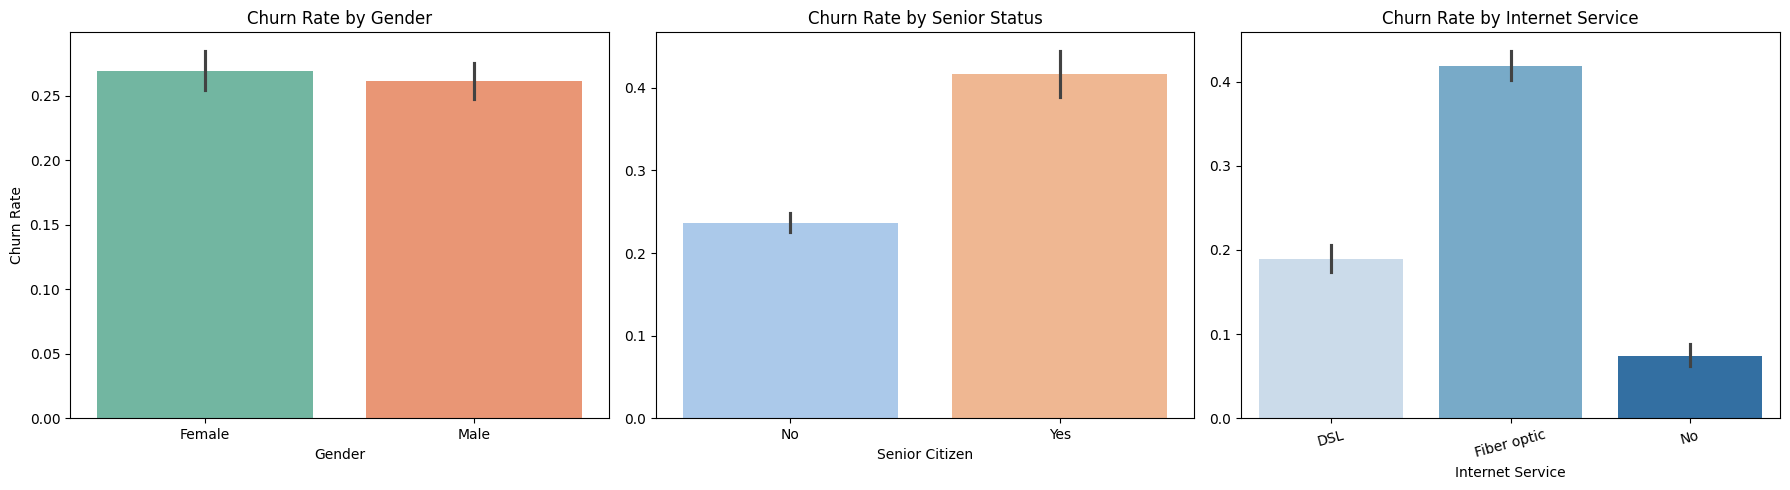

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Gender vs Churn
sns.barplot(x='gender', y='Churn', data=df, palette='Set2', ax=axs[0], legend=False)
axs[0].set_title('Churn Rate by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Churn Rate')

# SeniorCitizen vs Churn
sns.barplot(x='SeniorCitizen', y='Churn', data=df, palette='pastel', ax=axs[1], legend=False)
axs[1].set_title('Churn Rate by Senior Status')
axs[1].set_xlabel('Senior Citizen')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['No', 'Yes'])
axs[1].set_ylabel('')

# InternetService vs Churn
sns.barplot(x='InternetService', y='Churn', data=df, palette='Blues', ax=axs[2], legend=False)
axs[2].set_title('Churn Rate by Internet Service')
axs[2].set_xlabel('Internet Service')
axs[2].set_ylabel('')
axs[2].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()


In [5]:
# 2. Which service features correlate most strongly with retention?

/var/folders/qw/bztftfp95fsdml60_84h9d3m0000gn/T/ipykernel_63988/3449793326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Contract', y='Churn', data=df, palette='Set1')


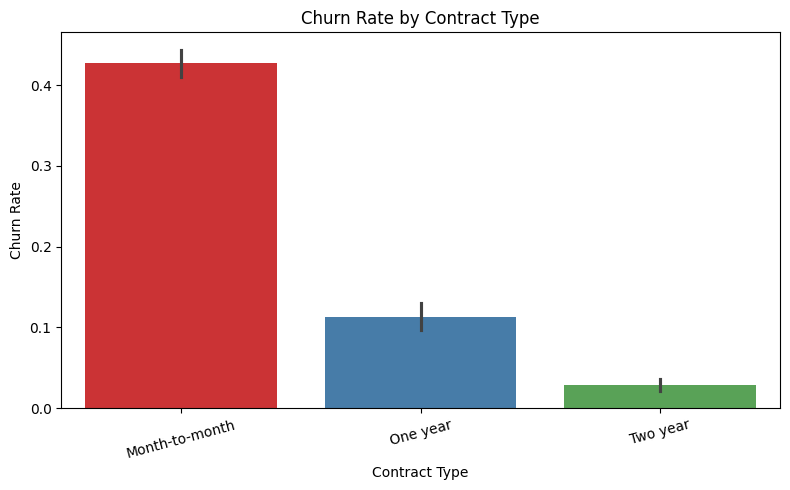

In [6]:
# Contract vs Churn
plt.figure(figsize=(8, 5))
sns.barplot(x='Contract', y='Churn', data=df, palette='Set1')
plt.title('Churn Rate by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [7]:
#3. How to optimize retention spending based on churn probability?

            tenure  MonthlyCharges
count  5174.000000     5174.000000
mean     37.569965       61.265124
std      24.113777       31.092648
min       0.000000       18.250000
25%      15.000000       25.100000
50%      38.000000       64.425000
75%      61.000000       88.400000
max      72.000000      118.750000


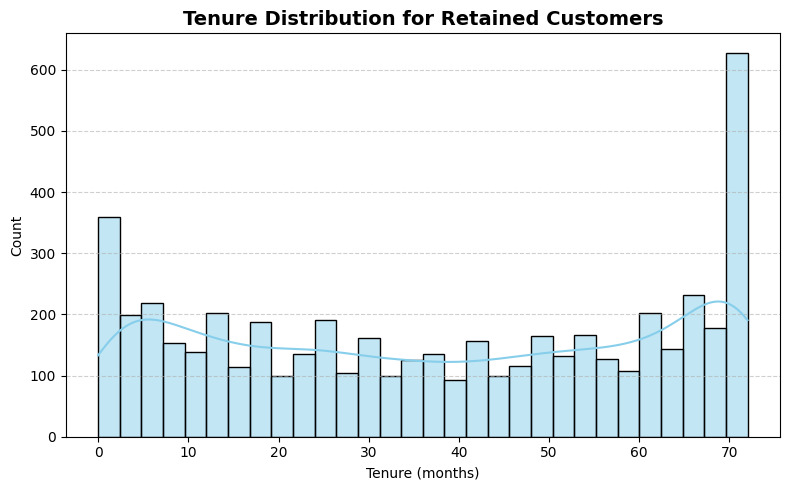

/var/folders/qw/bztftfp95fsdml60_84h9d3m0000gn/T/ipykernel_63988/2214213124.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract', y='MonthlyCharges', data=stayers, palette='Set3')


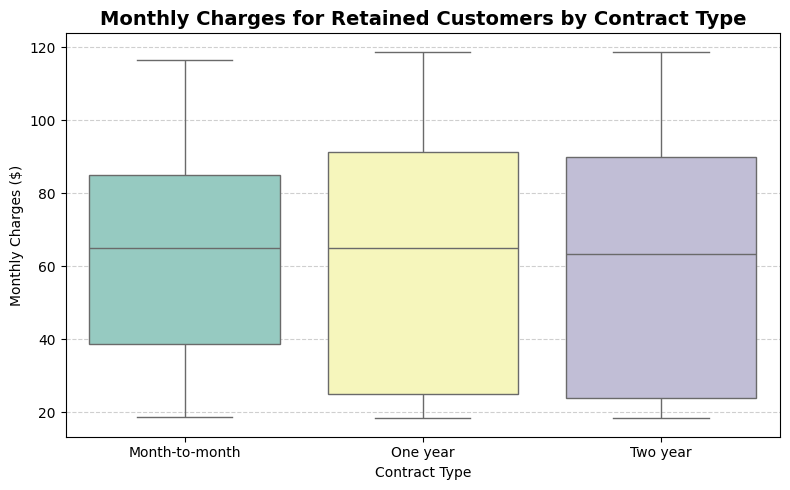

In [8]:
# Filter only the remaining customers
stayers = df[df['Churn'] == 0]

print(stayers[['tenure', 'MonthlyCharges', 'TotalCharges']].describe())

# tenure distribution map
plt.figure(figsize=(8, 5))
sns.histplot(stayers['tenure'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Tenure Distribution for Retained Customers', fontsize=14, weight='bold')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# according to the contract type to check the monthlycharges
plt.figure(figsize=(8, 5))
sns.boxplot(x='Contract', y='MonthlyCharges', data=stayers, palette='Set3')
plt.title('Monthly Charges for Retained Customers by Contract Type', fontsize=14, weight='bold')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
